<a href="https://colab.research.google.com/github/AlvearVanessa/TFM/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo final de máster: Predicción de la edad a partir del estado de la retina mediante técnicas de aprendizaje profundo
---


#Introducción
---

Este es el Notebook 11. El objetivo es crear un modelo de **Ensemble** a partir de los 3 mejores modelos para realizar regresión en imágenes utilizando algunas de las técnicas de Aprendizaje profundo.


Los tres mejores modelos obtenidos son: *EfficientNetB3, ReseNet152 y ResNet34.*

#Autora
---

Este trabajo es realizado por:

- Mayra Vanessa Alvear Gallón

Las funciones construidas para el desarrollo del **Ensemble** son creadas por:

- Mayra Vanessa Alvear Gallón


#Objetivo
---


El objetivo es crear un modelo de regresión en imágenes en el que podamos predecir empleando varios modelos y devolver una media de las predicciones obtenidas de los mejores modelos. La idea es utilizar alguna de las técnicas de Aprendizaje profundo vistas en clase. 

El problema que se quiere resolver es de regresión, esto es, a partir de una imagen de fondo de ojo de retina, se quiere predecir la edad de la persona.

# Librerías
---


Para iniciar, se descarga la última versión de la librería *Fastai*. Al finalizar la instalación, se debe reiniciar el kernel (menú Entorno de ejecución -> Reiniciar Entorno de ejecución).

In [ ]:
!pip install fastai -Uq

     |████████████████████████████████| 214 kB 33.5 MB/s 
     |████████████████████████████████| 61 kB 8.3 MB/s 


In [ ]:
!pip install wwf timm -qqq

     |████████████████████████████████| 431 kB 40.4 MB/s 


Se cargan aquellas librerías que son necesarias.

In [ ]:
# models and deep learning library
from fastai.vision.all import *
from wwf.vision.timm import *

# preprocessing and data management
import scipy.io
import pandas as pd
from datetime import datetime, timedelta

#Split dataset
from sklearn.model_selection import train_test_split

# model evaluation
from fastai.metrics import mae
from sklearn.metrics import mean_absolute_error as MAE

In [ ]:
from IPython.display import Image

# Análisis de datos
---

Se va a utilizar el conjunto de datos obtenido como resultado del preprocesado realizado en el notebook 1.

## Dataset
---

**El conjunto de datos**

Contiene imágenes de fondo de ojo con etiquetas de edad para entrenamiento. Estas imágenes son de tamaño 299x299, algunas son del ojo izquierdo y otras del ojo derecho, esto se puede visualizar a partir de la ubicación del disco óptico

Dado que los archivos se encuentra en una carpeta de Google Drive, se carga para acceder a los archivos

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Se explora el contenido de este conjunto de datos. Para ello, se crea un objeto [Path](https://docs.python.org/3/library/pathlib.html) que apunta al directorio que acabamos de crear. 

Con el objeto path se pueden utilizar funciones como `ls()`.

`path` es la carpeta que contiene todas las carpetas del trabajo

In [ ]:
path = Path('/content/drive/MyDrive/dataset_retina/')

In [ ]:
path.ls()

(#11) [Path('/content/drive/MyDrive/dataset_retina/dataframes.zip'),Path('/content/drive/MyDrive/dataset_retina/original_test.zip'),Path('/content/drive/MyDrive/dataset_retina/original_train.zip'),Path('/content/drive/MyDrive/dataset_retina/nuevo_testing.zip'),Path('/content/drive/MyDrive/dataset_retina/nuevo_training.zip'),Path('/content/drive/MyDrive/dataset_retina/dataframes.zip (Unzipped Files)'),Path('/content/drive/MyDrive/dataset_retina/dataframes'),Path('/content/drive/MyDrive/dataset_retina/datasets'),Path('/content/drive/MyDrive/dataset_retina/notebooks'),Path('/content/drive/MyDrive/dataset_retina/Ensemble')...]

`pathAllImages` es la carpeta que contiene todas las archivos de las imagenes de *train* y de *test*.

In [ ]:
pathAllImages = Path('/content/drive/MyDrive/dataset_retina/Todas_imagenes/all_images')

`pathDataframes` es la carpeta que contiene todos los ficheros de anotación

In [ ]:
pathDataframes = Path('/content/drive/MyDrive/dataset_retina/dataframes')

`pathDatasets` es la carpeta que contiene las carpetas con los archivos de los conjuntos de datos de *test* y *train*. Por lo tanto, contiene las carpetas `train` y `test`

In [ ]:
pathDatasets = Path('/content/drive/MyDrive/dataset_retina/datasets')

Veamos que `pathDatasets` contiene las carpetas `train` y `test`

In [ ]:
pathDatasets.ls()

(#2) [Path('/content/drive/MyDrive/dataset_retina/datasets/train'),Path('/content/drive/MyDrive/dataset_retina/datasets/test')]

Guardamos las rutas de las carpetas de de `train`  en `trainPath` y de `test` en `testPath`

In [ ]:
trainPath = pathDatasets/'train'
testPath = pathDatasets/'test'

Veamos algunos de los archivos que contiene la carpeta `train` mediante la ruta `trainPath`

In [ ]:
trainPath.ls()

(#34992) [Path('/content/drive/MyDrive/dataset_retina/datasets/train/anonymized_1000305.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/train/anonymized_1001345.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/train/anonymized_1002097.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/train/anonymized_1001957.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/train/anonymized_100760.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/train/anonymized_1005146.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/train/anonymized_10189.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/train/anonymized_102768.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/train/anonymized_105161.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/train/anonymized_104924.jpg')...]

Veamos algunos de los archivos que contiene la carpeta `test` mediante la ruta `testPath`

In [ ]:
testPath.ls()

(#8748) [Path('/content/drive/MyDrive/dataset_retina/datasets/test/anonymized_795734.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/test/anonymized_796326.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/test/anonymized_797216.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/test/anonymized_797382.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/test/anonymized_79743.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/test/anonymized_799441.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/test/anonymized_800204.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/test/anonymized_801406.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/test/anonymized_802443.jpg'),Path('/content/drive/MyDrive/dataset_retina/datasets/test/anonymized_803215.jpg')...]

Se cargan los *dataframes* `dfTrain` y `dfTest`, donde se almacenan los ficheros de anotación del conjunto de `train` y de `test`, respectivamente.

In [ ]:
dfTrain = pd.read_csv(pathDataframes/'train.csv')
dfTest = pd.read_csv(pathDataframes/'test.csv')

Las dimensiones de `dfTrain` son 34991 instancias y 2 campos.

In [ ]:
dfTrain.shape

(34991, 2)

Veamos las primeras 3 instancias de `dfTrain`

In [ ]:
dfTrain.head(3)

,nombre_foto,edad
0,anonymized_1291978.jpg,72
1,anonymized_760487.jpg,60
2,anonymized_793931.jpg,52


Las dimensiones de `dfTest` son 8748 instancias y 2 campos.

In [ ]:
dfTest.shape

(8748, 2)

Veamos las primeras 3 instancias de `dfTest`

In [ ]:
dfTest.head(3)

,nombre_foto,edad
0,anonymized_341764.jpg,51
1,anonymized_698952.jpg,69
2,anonymized_208387.jpg,46


# Comparación entre todos los modelos

---

Teniendo en cuenta que se ha terminado el estudio de los modelos, se pueden observar los siguientes resultados:





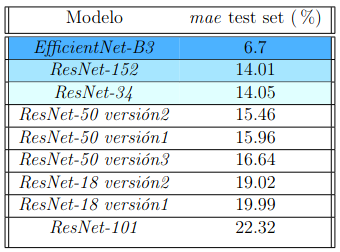

In [6]:
Image("/content/resultados_modelos.png")

Se puede observar que los mejores son: *EfficientNet-B3*, *ResNet-152* y *ResNet-34*, para el testeo. Por tanto, podemos unir estos modelos, a través de un modelo de **Ensemble**.

# Cargando el *dataset*
---

Se carga el *dataset* para poder posteriormente crear el modelo. Este proceso se hace en dos pasos. Primero se construye un objeto `DataBlock` y a continuación se construye un objeto `DataLoader` a partir del `DataBlock`.


# Cargando los modelos 
---

Para realizar el **Ensemble** hemos elegido los mejores tres modelos, los cuales han sido entrenados previamente:



1.   El *notebook* 8 contiene el modelo *EfficientNet-B3*
2.   El *notebook* 9 contiene el modelo *ResNet-152*
3.   El *notebook* 7 contiene el modelo *ResNet-34*

Por tanto, se han exportado cada uno de los modelos (mencionados anteriormente) como: `export_model8.pkl, export_model9.pkl` y `export_model7.pkl`. 




Además, denotaremos:

- Modelo 1 a *EfficientNet-B3*
- Modelo 2 a *ResNet-152*
- Modelo 3 a *ResNet-34*


Se carga el `path` que contiene el *export* de los modelos

In [ ]:
path_models = Path('/content/drive/MyDrive/dataset_retina/Ensemble/data_models_retina_exports/')

Importamos los 3 mejores modelos 

In [ ]:
learn_model1 = load_learner(os.path.join(path_models, 'export_model8.pkl'))

In [ ]:
learn_model2 = load_learner(os.path.join(path_models, 'export_model9.pkl'))

In [ ]:
learn_model3 = load_learner(os.path.join(path_models, 'export_model7.pkl'))

Verificamos si los modelos están cargando bien. Por lo que realizamos la predicción sobre una imagen en particular tomada del conjunto de `test` cuya edad real es 51 años.

In [ ]:
img = '/content/anonymized_341764.jpg' #ground truth 51

In [ ]:
imagen1 = dfTest['nombre_foto'] == 'anonymized_341764.jpg'
df_imagen1 = dfTest.loc[imagen1]
df_imagen1.head()

,nombre_foto,edad
0,anonymized_341764.jpg,51


Utilizamos el método `predict` sobre el *Learner* del  **modelo 1 *EfficientNet-B3*** para la imagen anterior y obtenemos que la edad predicha es 50 años 

In [ ]:
learn_model1.predict(img)

((50.066566467285156), TensorBase([50.0666]), TensorBase([50.0666]))

Utilizamos el método `predict` sobre el *Learner* del **modelo 2 *ResNet-152*** para la imagen anterior y obtenemos que la edad predicha es 45 años

In [ ]:
learn_model2.predict(img)

((44.966514587402344), TensorBase([44.9665]), TensorBase([44.9665]))

Utilizamos el método `predict` sobre el *Learner* del **modelo 3 *ResNet-34*** para la imagen anterior y obtenemos que la edad predicha es 53 años

In [ ]:
learn_model3.predict(img)

((52.76578140258789), TensorBase([52.7658]), TensorBase([52.7658]))

Considere la lista de los mejores modelos

In [ ]:
lista_modelos = [learn_model1, learn_model2, learn_model3]

## Evaluando el modelo en el conjunto de *test*
---

Para poder evaluar el modelo en el conjunto de *test* debemos crear un nuevo `DataBlock` y un nuevo `DataLoader`. La única diferencia con el `DataBlock` utilizado previamente es que para hacer la partición del *dataset* usamos un objeto de la clase `IndexSplitter` para indicar el conjunto de *test*. En el caso del `DataLoader`, cambiamos la ruta al path. 

En este caso, concatenamos los *dataframes* *dfTrain* y *dfTest*

In [ ]:
df1 = pd.concat([dfTrain, dfTest]) #El orden de concatenación es importante: Los de train están arriba y test abajo

`df1` es el *dataframe* que contiene las anotaciones de todas las imágenes tanto de *train* como *test*. La dimensión consta de 43739 instancias y 2 campos.

In [ ]:
df1.shape

(43739, 2)

Veamos las primeras 3 instancias de *df1*

In [ ]:
df1.head(3)

,nombre_foto,edad
0,anonymized_1291978.jpg,72
1,anonymized_760487.jpg,60
2,anonymized_793931.jpg,52


Se hace un `get_x` y un `get_y` usando el *dataframe*

In [ ]:
get_x = ColReader('nombre_foto', pref= pathAllImages)
get_y = ColReader('edad')

Dado que, el conjunto de *test* se ha creado a partir de un subconjunto del *dataset*, entonces para considerarlo en la evaluación del modelo, usamos la clase ``IndexSplitter``.

Para ello, se ha creado el dataframe *df1*, construido a partir de la concatenación del *dfTrain* y *dfTest* (en este orden). Luego, se seleccionan sólo los elementos de *test* de *df1* teniendo en cuenta las longitudes de *dfTrain* y de *df1*. De esta manera, esta clase divide los elementos de *dfTest* en el conjunto de validación y los demás en el conjunto de entrenamiento.

Creamos el `DataBlock`

In [ ]:
#RegressionBlock: Bloque de transformación para variables objetivos flotantes
dbTest = DataBlock(blocks=(ImageBlock, RegressionBlock()), #Recibe imágenes y devuelve un RegressionBlock
                  get_x = get_x, 
                  get_y = get_y, 
                  splitter= IndexSplitter(range(len(dfTrain), len(df1))),  #Para carpetas GrandparentSplitter(valid_name='dfTest').l 15% de los datos de Training son para validar
                  #splitter=GrandparentSplitter(valid_name='test'), #Usamos el conjunto de test
                  item_tfms = Resize(299, method='squish'), 
                  batch_tfms=[*aug_transforms(size=224, flip_vert = True)])

Construimos el `DataLoader` a partir del objeto `DataBlock`

In [ ]:
dlsTest = dbTest.dataloaders(df1,bs=50)

Para trabajar con este `DataLoader` se debe modificar el objeto `Learner`. En concreto su atributo `dls`. 

In [ ]:
learn_model1.dls = dlsTest

Por último, se evalúa el modelo usando el método `validate` y verificamos que el valor de la métrica `mae` obtenido en el modelo 1 es 6.7%.

In [ ]:
learn_model1.validate()

(#2) [85.05048370361328,6.732570171356201]

También podemos obtener el tensor de las predicciones mediante el método `get_preds`, el cual contiene dos tensores, el primero indica el valor de las predicciones obtenidas para cada imagen y el segundo, son los valores de la variable objetivo.

In [ ]:
pred_model1 = learn_model1.get_preds()

Se visualiza el tensor de las predicciones

In [ ]:
pred_model1

(TensorBase([[50.0665],
         [58.4418],
         [59.2487],
         ...,
         [47.2110],
         [59.6881],
         [55.5922]]), tensor([51., 69., 46.,  ..., 49., 65., 50.]))

La longitud del tensor es

In [ ]:
len(pred_model1)

2

La componente uno y dos tienen la misma longitud 

In [ ]:
len(pred_model1[0])

8748

In [ ]:
len(pred_model1[1])

8748

# Modelo 10: Ensemble de los mejores modelos
---

Ahora que se ha visto que el modelo se carga bien y se pueden obtener sus predicciones. Se quiere aplicar esto para cada uno de los modelos y generar el **Ensemble**.

A continuación se va a construir el **Ensemble** a partir de los modelos EfficientNet-B3, ResNet-152 y ResNet34. Se quiere obtener un mejor resultado empleando los modelos obtenidos para lograr mejores predicciones.

##Construyendo el modelo
---

Para su construcción, se consideran las predicciones de cada modelo, se calcula la media de cada uno de las entradas de estos valores, estas serán las entradas del array que formará el **Ensemble**.

Si se analiza el proceso, se puede detallar de la siguiente manera: como se quiere evaluar sobre el conjunto de *test*, entonces, se construye el objeto *dbTest*, el cual es el *DataBlock* que permite construir el *DataLoader*. Luego, se construye el objeto dlsTest, el cual es el *DataLoader* a partir del conjunto de *test*. Por último, a partir de algunas funciones que hemos creado, se realizan las operaciones y se obtiene el **Ensemble**. De esta manera, con el **Ensemble** y el *ground truth*, sólo queda validarlo usando la métrica *Mean Absolute Error* (*mae*). 


Para ello, creamos algunas funciones:

La función *prediccion_modelo* genera una lista formada por las predicciones de un modelo dado, utilizando el método `get_preds()`.

In [ ]:
def prediccion_modelo(Modelo):
    dlsTest = dbTest.dataloaders(df1,bs=150)
    model = Modelo
    model.dls = dlsTest
    pred = model.get_preds()[0]
    return pred

Por ejemplo, se obtiene el tensor de los resultados de las predicciones del modelo 1. 

In [ ]:
pred = prediccion_modelo(learn_model1)

Visualizamos el tensor de las predicciones

In [ ]:
pred

TensorBase([[50.0665],
        [58.4418],
        [59.2487],
        ...,
        [47.2110],
        [59.6881],
        [55.5922]])

La longitud del tensor es

In [ ]:
len(pred)

8748

Comparando con las dimensiones del conjunto de test

In [ ]:
dfTest.shape

(8748, 2)

In [ ]:
dfTest.head(5)

,nombre_foto,edad
0,anonymized_341764.jpg,51
1,anonymized_698952.jpg,69
2,anonymized_208387.jpg,46
3,anonymized_118817.jpg,69
4,anonymized_1311174.jpg,32


Esto conlleva a construir una función *predicciones*. Dada una lista de modelos, esta función da una lista formada por las predicciones (una entrada por cada modelo).

In [ ]:
def predicciones(listaModelos):
  k = []
  for i in range(len(listaModelos)):
    dlsTest = dbTest.dataloaders(df1,bs=150)
    model = listaModelos[i]
    model.dls = dlsTest
    pred = model.get_preds()[0]
    k.append(pred) #k es el array con las predicciones de cada uno de los modelos (cada uno es un tensor)
    #m = list(zip(*k)) #Genera tuplas con los primeros elementos de k
  return k

Se aplica a la lista de modelos definida anteriormente

In [ ]:
pred_models = predicciones(lista_modelos)

y la visualizamos como

In [ ]:
pred_models

[TensorBase([[50.0665],
         [58.4418],
         [59.2487],
         ...,
         [47.2110],
         [59.6881],
         [55.5922]]), TensorBase([[57.0196],
         [67.7132],
         [70.7144],
         ...,
         [58.1541],
         [71.0479],
         [61.7296]]), TensorBase([[61.9413],
         [71.4177],
         [67.6721],
         ...,
         [65.1832],
         [77.6081],
         [67.0375]])]

La longitud del tensor es 3. Tiene una entrada para cada modelo

In [ ]:
len(pred_models)

3

Cada tensor tiene 8748 entradas de las imagenes del conjunto de test

In [ ]:
len(pred_models[0]) 

8748

Ahora bien, se define la función *primeros_elementos_predicciones*, dada una lista de modelos, genera tuplas formadas por los primeros (sucesivamente con los demás) elementos de cada tensor de las predicciones de cada modelo.

In [ ]:
def primeros_elementos_predicciones(listaModelos):
  k = []
  for i in range(len(listaModelos)):
    dlsTest = dbTest.dataloaders(df1,bs=150)
    model = listaModelos[i]
    model.dls = dlsTest
    pred = model.get_preds()[0]
    k.append(pred) #k es el array con las predicciones de cada uno de los modelos (cada uno es un tensor)
    m = list(zip(*k)) #Genera tuplas con los primeros elementos de k
  return m

Como se puede ver a continuación

In [ ]:
arreglo_predicciones = primeros_elementos_predicciones(lista_modelos)

Se puede ver así

In [ ]:
arreglo_predicciones

[(TensorBase([50.0665]), TensorBase([57.0196]), TensorBase([61.9413])),
 (TensorBase([58.4418]), TensorBase([67.7132]), TensorBase([71.4177])),
 (TensorBase([59.2487]), TensorBase([70.7144]), TensorBase([67.6721])),
 (TensorBase([71.8626]), TensorBase([75.1343]), TensorBase([75.2513])),
 (TensorBase([23.7353]), TensorBase([37.6293]), TensorBase([23.1596])),
 (TensorBase([29.4019]), TensorBase([38.7788]), TensorBase([45.3826])),
 (TensorBase([50.6125]), TensorBase([64.0291]), TensorBase([71.2993])),
 (TensorBase([54.1662]), TensorBase([66.1226]), TensorBase([69.6431])),
 (TensorBase([53.3044]), TensorBase([69.7507]), TensorBase([74.6447])),
 (TensorBase([26.1489]), TensorBase([50.3413]), TensorBase([29.5655])),
 (TensorBase([61.7865]), TensorBase([71.2276]), TensorBase([74.5042])),
 (TensorBase([43.1795]), TensorBase([67.0704]), TensorBase([63.1975])),
 (TensorBase([54.8185]), TensorBase([71.2125]), TensorBase([76.3400])),
 (TensorBase([31.0841]), TensorBase([59.2546]), TensorBase([48.8

Finalmente, se calcula la media de cada fila obtenida, mediante la función *ensemble_models*

In [ ]:
w =[]
def ensemble_models(m):
  for j in range(len(m)):
    media = sum(m[j])/(len(m[0]))
    w.append(media)
  return w

In [ ]:
ensemble = ensemble_models(arreglo_predicciones)

Se puede visualizar así

In [ ]:
ensemble

[TensorBase([56.3425]),
 TensorBase([65.8576]),
 TensorBase([65.8784]),
 TensorBase([74.0827]),
 TensorBase([28.1747]),
 TensorBase([37.8544]),
 TensorBase([61.9803]),
 TensorBase([63.3106]),
 TensorBase([65.8999]),
 TensorBase([35.3519]),
 TensorBase([69.1727]),
 TensorBase([57.8158]),
 TensorBase([67.4570]),
 TensorBase([46.4085]),
 TensorBase([55.1868]),
 TensorBase([66.0400]),
 TensorBase([59.6165]),
 TensorBase([73.4746]),
 TensorBase([64.3180]),
 TensorBase([57.4350]),
 TensorBase([59.5608]),
 TensorBase([55.6673]),
 TensorBase([59.5869]),
 TensorBase([74.9391]),
 TensorBase([59.9531]),
 TensorBase([66.7260]),
 TensorBase([64.5848]),
 TensorBase([67.2137]),
 TensorBase([62.5667]),
 TensorBase([71.7786]),
 TensorBase([60.9459]),
 TensorBase([55.7248]),
 TensorBase([67.2342]),
 TensorBase([67.1652]),
 TensorBase([42.2504]),
 TensorBase([25.9053]),
 TensorBase([58.4584]),
 TensorBase([56.6049]),
 TensorBase([74.0301]),
 TensorBase([40.8246]),
 TensorBase([60.6795]),
 TensorBase([69.

In [ ]:
len(ensemble)

8748

Sin pérdida de generalidad, empleamos el tensor *ground truth* del modelo 1, dado por

In [ ]:
ground_truth = learn_model1.get_preds()[1];

Visualizamos el tensor

In [ ]:
ground_truth

tensor([51., 69., 46.,  ..., 49., 65., 50.])

Verificamos que contiene 8748 entradas

In [ ]:
ground_truth.shape

torch.Size([8748])

Para validar el modelo 1, se emplea la métrica *mae*

In [ ]:
MAE(ensemble, ground_truth)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: FutureWarning: The input object of type 'TensorBase' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'TensorBase', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/pytho

9.967426324032408

Por lo tanto, obtenemos un  ***mae* de 9.97**

Ahora bien, todo el proceso anterior lo podemos resumir en la siguiente función *tensor_preds* la cual recibe el *dataframe* y la lista de modelos, por lo tanto la siguiente función construye el **Ensemble**.

In [ ]:
def tensor_preds(df, listaModelos):

  df1 = pd.concat([dfTrain, dfTest])
  
  #RegressionBlock: Bloque de transformación para variables objetivos flotantes
  dbTest = DataBlock(blocks=(ImageBlock, RegressionBlock()), #Recibe imágenes y devuelve un RegressionBlock
                    get_x = get_x, 
                    get_y = get_y, 
                    splitter= IndexSplitter(range(len(dfTrain), len(df1))),  #Para carpetas GrandparentSplitter(valid_name='dfTest').l 15% de los datos de Training son para validar
                    item_tfms = Resize(299, method='squish'), 
                    batch_tfms=[*aug_transforms(size=224, flip_vert = True)])
  
  k = []
  lista = []
  w = []
  for i in range(len(listaModelos)):
    dlsTest = dbTest.dataloaders(df1,bs=150)
    model = listaModelos[i]
    model.dls = dlsTest
    pred = model.get_preds()[0]
    k.append(pred) #k es el array con las predicciones de cada uno de los modelos (cada uno es un tensor)
    m = list(zip(*k)) #Genera tuplas con los primeros elementos de k
    #media = (np.sum(m, axis=0))/(len(k[0][0])) #Todos los modelos tienen el tensor del mismo tamaño por la longitud de dfTest 
        
  for j in range(len(m)):
      media = sum(m[j])/(len(m[0]))
      w.append(media)
  #media = (np.sum(m[j], axis=0))/(len(m[0])) #Todos los modelos tienen el tensor del mismo tamaño por la longitud de dfTest     
  return w

In [ ]:
ensemble_final = tensor_preds(df1, lista_modelos)

Veamos las dimensiones del tensor obtenido 

In [ ]:
dfTest.shape

(8748, 2)

Validamos el modelo con la métrica *mae*

In [ ]:
MAE(ensemble_final, ground_truth)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: FutureWarning: The input object of type 'TensorBase' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'TensorBase', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/pytho

9.967426324032408

El resultado mejora con un ***mae* de 9.97** comparado con el *mae* obtenido con las redes neuronales *ResNet-152* y *ResNet-34*. Nuestro mejor modelo continúa siendo *EfficientNet-B3*

Además, no se pueden visualizar las predicciones obtenidas sobre algunas imágenes del conjunto de *test*, ni exportar porque el ensemble en su construcción no tiene el atributo `show_results` y `export`. 

Guardamos el ensemble como un csv

In [ ]:
ensemble_array = np.array(ensemble_final)
print("Array = ", ensemble_array)

Array =  [TensorBase([56.3425]) TensorBase([65.8576]) TensorBase([65.8784]) ...
 TensorBase([56.8494]) TensorBase([69.4480]) TensorBase([61.4531])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The input object of type 'TensorBase' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'TensorBase', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
ensemble_array

array([TensorBase([56.3425]), TensorBase([65.8576]),
       TensorBase([65.8784]), ..., TensorBase([56.8494]),
       TensorBase([69.4480]), TensorBase([61.4531])], dtype=object)

In [ ]:
#Converting the tensor output to a list of predicted values
ensemble_array = [i[0] for i in ensemble_array.tolist()]

#Converting the prediction to . a dataframe
ensemble_array = pd.DataFrame(ensemble_array, columns = ['edad'])

#Writing the predictions to an csv file.
ensemble_array.to_csv("ensemble_array.csv", index = False)

## Usando el modelo
---



Se puede ver cómo usar el modelo ante una nueva imagen. Si se quiere utilizar el modelo para realizar predicciones, debemos definir una función para predecir ello.

Se carga una imagen del conjunto de *test* y se predice la edad sobre la persona de la misma

In [ ]:
dfTest.head(6)

,nombre_foto,edad
0,anonymized_341764.jpg,51
1,anonymized_698952.jpg,69
2,anonymized_208387.jpg,46
3,anonymized_118817.jpg,69
4,anonymized_1311174.jpg,32
5,anonymized_1326804.jpg,32


Se elige la primera imagen

In [ ]:
img = '/content/anonymized_341764.jpg' #ground truth 51 

Se crea la función para predecir la edad a partir de los mejores modelos

In [ ]:
def tensor_preds_inference(imagen, listaModelos):
  k = []
  w =[]
  lista = []
  for i in range(len(listaModelos)):
    model = listaModelos[i]
    pred = model.predict(imagen)[0]
    k.append(pred) #k es el tensor con las predicciones de cada uno de los modelos sobre una imagen dada
    m = list(zip(*k)) #Genera tuplas con los primeros elementos de k
  for j in range(len(m)):
    mean = sum(m[j])/(len(m[0]))
    w.append(mean)
  #media = (np.sum(m[j], axis=0))/(len(m[0])) #Todos los modelos tienen el tensor del mismo tamaño por la longitud de dfTest     
  return w
      

In [ ]:
predicciones_imagen = tensor_preds_inference(img, lista_modelos)

Por lo tanto, la predicción de la edad para la imagen empleada es 56 años cuando su edad real es 51 años.

In [ ]:
predicciones_imagen

[56.342464447021484]

##HuggingFace 
---
*HuggingFace* proporciona una aplicación para nuestro modelo. En nuestro caso usamos el mejor modelo *EfficientNet-B3*. El enlace al espacio de *HuggingFace* asociado al modelo es:

[Aplicación para predecir la edad de un paciente a partir de imágenes de fondo de ojo de retina](https://huggingface.co/spaces/AlvearVanessa/TFM1)


Ahora bien, en la aplicación hemos usado dos imágenes:

- La primera con un *ground truth* de 49 años. Luego, la edad predicha es 56 años.

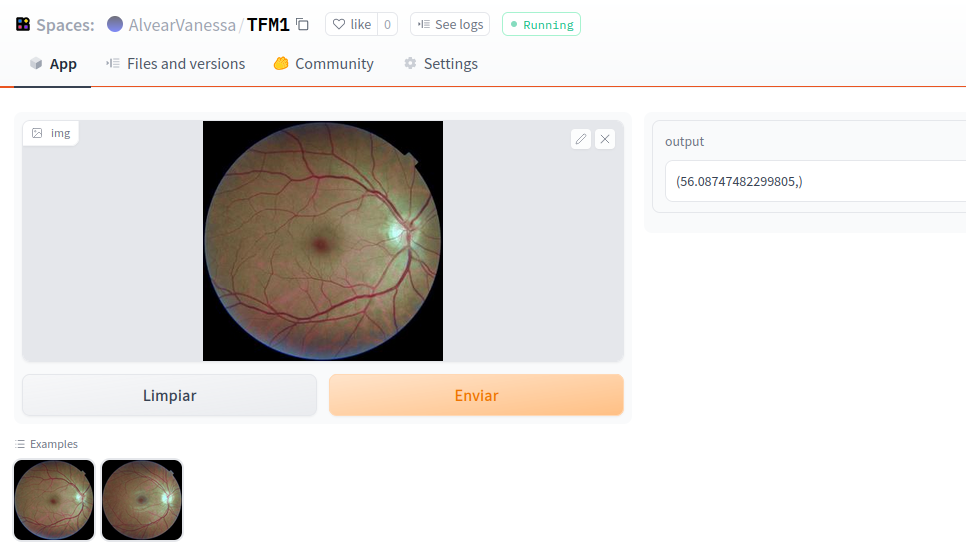

In [2]:
Image("/content/hf_img1.png")

- La segunda con un *ground truth* de 32 años. Luego, la edad predicha es 36 años.

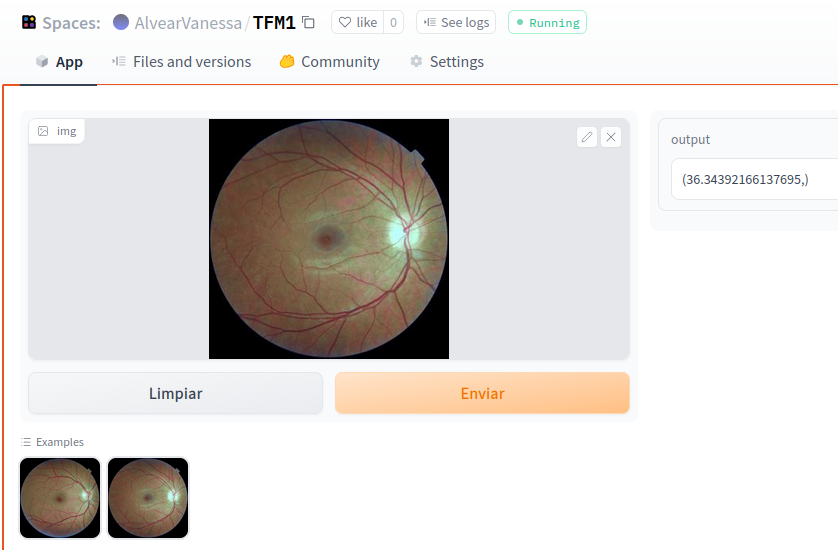

In [3]:
Image("/content/hf_img2.png")

A continuación, veamos las predicciones que realiza nuestro modelo de **Ensemble** sobre las mismas dos imágenes

Se cargaron las dos imágenes

In [ ]:
img2 = '/content/anonymized_1284335.jpg' 
img3 = '/content/anonymized_1326804.jpg' 

Verificamos las edades reales en el fichero de anotación

In [ ]:
imagen2 = dfTest['nombre_foto'] == 'anonymized_1284335.jpg'
imagen3 = dfTest['nombre_foto'] == 'anonymized_1326804.jpg'
df_imagen2 = dfTest.loc[imagen2]
df_imagen3 = dfTest.loc[imagen3]

In [ ]:
df_imagen2.head()

,nombre_foto,edad
8745,anonymized_1284335.jpg,49


In [ ]:
df_imagen3.head()

,nombre_foto,edad
5,anonymized_1326804.jpg,32


Ahora bien, aplicamos el **Ensemble** a las mismas imágenes del *HuggingFace*

In [ ]:
predicciones_imagen2 = tensor_preds_inference(img2, lista_modelos)
predicciones_imagen2

[56.84945170084635]

In [ ]:
predicciones_imagen3 = tensor_preds_inference(img3, lista_modelos)
predicciones_imagen3

[37.85441780090332]

Por lo tanto, en nuestro modelo de **Ensemble**:

- Para la imagen con *ground truth* de 49 años, la edad predicha es 57 años. 

- Para la imagen con *ground truth* de 32 años, la edad predicha es 38 años. 